In [41]:
import sys
import sklearn
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [59]:
# Reset PN-sequence generator.
seed = 4
np.random.seed(seed)

### Criando conjunto de exemplos em 3 dimensões (3D)

In [60]:
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

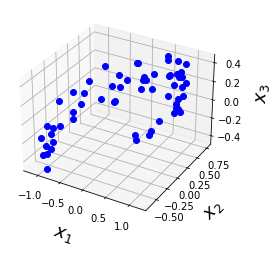

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X[:, 0], X[:, 1], X[:, 2], "bo")
ax.set_xlabel("$x_1$", fontsize=18, labelpad=10)
ax.set_ylabel("$x_2$", fontsize=18, labelpad=10)
ax.set_zlabel("$x_3$", fontsize=18, labelpad=10)
plt.show()

### Usando SciKit-Learn para reduzir a dimensionalidade para d = 2.

+ A classe PCA da biblioteca Scikit-Learn implementa o algoritmo PCA usando a decomposição SVD. 
+ O código a seguir aplica o PCA para reduzir a dimensionalidade do conjunto de dados para 2 dimensões 

**OBS.**: O PCA assume que o conjunto de dados está centrado em torno da origem, ou seja, média igual a 0. A classe PCA do Scikit-Learn se encarrega de centralizar automaticamente os dados.

In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

Depois de ajustar o `PCA` ao conjunto de dados, podemos acessar os componentes principais usando o atributo `components_` da classe `PCA`.

**OBS.**: observem que o atributo `components_` contém os CPs como vetores horizontais, então, por exemplo, o primeiro componente principal é igual a 

```python
pca.components_.T[:, 0]
```

In [46]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

### Proporção de variância explicada

+ Outra informação muito útil é a proporção de variância explicada de cada componente principal, disponível por meio do atributo `explain_variance_ratio_`. 

+ Ele indica a proporção da variância do conjunto de dados que se encontra ao longo do eixo de cada componente principal. 

+ Vamos dar uma olhada nas proporções de variância explicadas dos primeiros dois componentes do conjunto de dados.

In [47]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

+ Esses valores indicam que 84,2% da variância do conjunto de dados está ao longo do primeiro eixo e 14,6% ao longo do segundo eixo. 

+ Isso deixa menos de 1,2% para o terceiro eixo, portanto, é razoável supor que ele provavelmente contenha pouca informação eque possa ser realmente descartado como fizemos.

### Escolhendo o número correto de dimensões

+ Ao invés de escolher arbitrariamente o número de dimensões para reduzir o conjunto, geralmente é preferível escolher o número de dimensões que resultam em uma porção suficientemente grande da variância (por exemplo, de 90% a 95%). 

+ A menos, é claro, que você esteja reduzindo a dimensionalidade para visualização de dados - nesse caso, você geralmente desejará reduzir a dimensionalidade para 2 ou 3. 

+ O código a seguir executa PCA sem reduzir a dimensionalidade e, em seguida, calcula o número mínimo de dimensões necessárias para preservar 95 % da variância do conjunto de treinamento:

In [48]:
pca = PCA()

pca.fit(X)

cumsum = np.cumsum(pca.explained_variance_ratio_)

d = np.argmax(cumsum >= 0.95) + 1

print('Número de dimensões que preserva 95% da variância do conjunto original:',d)

Número de dimensões que preserva 95% da variância do conjunto original: 2


+ Você poderia então definir `n_components = d` e executar o PCA novamente para reduzir o número de dimensões. 

+ No entanto, há uma opção muito melhor: em vez de especificar o número de componentes principais que desejamos preservar, podemos definir o parâmetro `n_components` como um valor entre 0.0 e 1.0, indicando a proporção de variância que desejamos preservar:

In [50]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

+ Outra opção é plotar a variância explicada como uma função do número de dimensões (ou seja, simplesmente plotar o `cumsum`). 

+ Normalmente haverá um "joelho" na curva, onde a variância explicada para de crescer rapidamente. 

+ Podemos pensar nisso como a dimensionalidade intrínseca do conjunto de dados. 

+ Neste caso, podemos ver que reduzir a dimensionalidade para cerca de 100 dimensões não perderia muita da variância explicada.

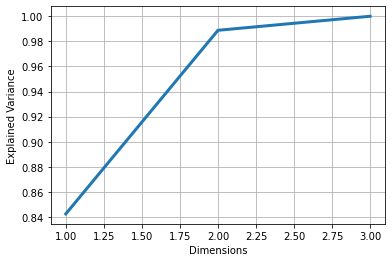

In [52]:
plt.figure()
plt.plot(range(1,len(cumsum)+1), cumsum, linewidth=3)
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.grid()
plt.show()

In [54]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

In [55]:
pca.n_components_

2

In [56]:
np.sum(pca.explained_variance_ratio_)

0.988804464429311

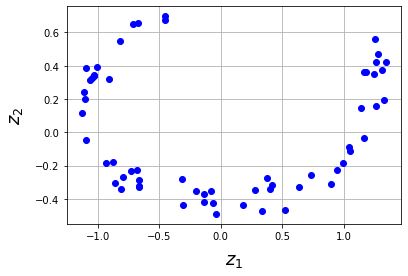

In [58]:
plt.figure()
plt.plot(X_reduced[:, 0], X_reduced[:, 1], "bo")
plt.xlabel("$z_1$", fontsize=18, labelpad=10)
plt.ylabel("$z_2$", fontsize=18, labelpad=10)
plt.grid()
plt.show()